# Supervised Learning - Glioma Grading Clinical and Mutation Features

![image](../images/brain-glioma.jpg)

---

## Group Members (Class 9 Group 2)

| Name | Student Number | Email |
| --- | --- | --- |
| [João Ramos](https://github.com/jfoliveiraramos) | 202108743 | up202108743@up.pt |
| [Marco Costa](https://github.com/SpardaMarco) | 202108821 | up202108821@up.pt |
| [Tiago Viana](https://github.com/tiagofcviana) | 201807126 | up201807126@up.pt |

---

## Introduction

**Gliomas** are the most common primary brain tumors.
Based on histological/imaging criteria, they can be classified as:
- LGG (Lower-Grade Glioma)
- GBM (Glioblastoma Multiforme)

For the grading process, clinical and molecular/mutation factors are highly important, and molecular tests for accurately diagnosing glioma patients are costly.

This is a **supervised learning** problem where the main goal is to leverage classification algorithms to grade gliomas based on clinical and genetic mutation features.
More specifically, we are trying to determine whether a glioma patient has **LGG** (Lower-Grade Glioma) or **GBM** (Glioblastoma Multiforme). 

Additionally, we are also trying to find the optimal subset of mutation genes and clinical features for the glioma grading process to improve performance and reduce costs.

The given dataset, from [Kaggle's Glioma Grading Clinical and Mutation Features](https://www.kaggle.com/datasets/vinayjose/glioma-grading-clinical-and-mutation-features), contains 862 records of patients who have brain glioma. Each record is characterized by **20** molecular features, each of which can be *mutated* or *not_mutated*, and **3** clinical features. Addionally, the dataset contains **2** features used to identify the original patient and **1** feature regarding the primary diagonsis given to the entry.

---

### Packages/Libraries:

- NumPy (1.26.0)
- MatPlotLib (3.8.4)
- Seaborn (0.13.2)
- Pandas (2.2.2)
- SciKit-Learn (1.4.2)

We used python 3.10.12 to develop this project.
To install the required packages/libraries, run:

In [56]:
%pip install -r "../requirements.txt"

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\joaof\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


---

## Data pre-processing

###  Data analysis

#### Create the dataframe

In [57]:
import pandas as pd

data = pd.read_csv("../data/TCGA_GBM_LGG_Mutations_all.csv")
data.head()

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,TCGA-LGG,TCGA-DU-8164,Male,51 years 108 days,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,TCGA-LGG,TCGA-QH-A6CY,Male,38 years 261 days,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,LGG,TCGA-LGG,TCGA-HW-A5KM,Male,35 years 62 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,TCGA-LGG,TCGA-E1-A7YE,Female,32 years 283 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,LGG,TCGA-LGG,TCGA-S9-A6WG,Male,31 years 187 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


#### Descriptive statistics

Before we started the data pre-processing, we performed some data analysis to understand the dataset better.

In [58]:
data.describe()

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
count,862,862,862,862,862,862,862,862,862,862,...,862,862,862,862,862,862,862,862,862,862
unique,2,2,862,3,838,7,6,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,LGG,TCGA-LGG,TCGA-DU-8164,Male,--,Glioblastoma,white,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
freq,499,499,1,499,5,360,766,448,508,642,...,815,821,824,833,834,834,835,839,839,840


In [59]:
print(f"The dataset contains {data.shape[0]} entries and {data.shape[1]-1} features.")

The dataset contains 862 entries and 26 features.


### Removal of redundant columns

The columns "Project", "Case_ID" and "Primary_Diagnosis" of the original dataset are not relevant for the classification task and will be removed.

The "Project" column identifies the name of the project, which is the same for all records, and the grade of the glioma, which is already present in the "Grade" column. The "Case_ID" is a unique identifier for each record, and the "Primary_Diagnosis" column corresponds to the primary diagnosis given to the patient, which won't be considered for the classification task.

In [60]:
data = data.set_index(data["Case_ID"])
data = data.drop(columns=["Case_ID", "Project", "Primary_Diagnosis"])
data.head()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
Case_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-DU-8164,LGG,Male,51 years 108 days,white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
TCGA-QH-A6CY,LGG,Male,38 years 261 days,white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
TCGA-HW-A5KM,LGG,Male,35 years 62 days,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
TCGA-E1-A7YE,LGG,Female,32 years 283 days,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
TCGA-S9-A6WG,LGG,Male,31 years 187 days,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


### Removal of invalid entries

Since the values in the "Grade" column and in all the columns that represent the genetic mutations are categorical and binary, we checked the unique values of each of those columns for invalid entries.

In [61]:
columns = []

## Check if the target column respects the binary categorization
if len(data["Grade"].unique()) != 2:
    columns.append("Grade")

## Check if the genetic mutations columns respect the binary categorization
for column in data.columns[4:24]:
    if len(data[column].unique()) != 2:
        columns.append(column)

if len(columns) == 0:
    print('The "Grade" and genetic mutations columns all have 2 unique values.')

else:
    for column in columns:
        print(f'"{column}" does not respect the binary categorization.')
        print(f'Unique values in "{column}": {data[column].unique()}\n')

The "Grade" and genetic mutations columns all have 2 unique values.


As the values in the "Gender" and the "Race" columns are also categorical, we also checked the unique values of those columns for invalid entries.

In [62]:
print(f'Unique values in "Gender": {data["Gender"].unique()}')
print(f'Unique values in "Race": {data["Race"].unique()}')

Unique values in "Gender": ['Male' 'Female' '--']
Unique values in "Race": ['white' 'asian' 'black or african american' '--' 'not reported'
 'american indian or alaska native']


To facilitate the analysis, we will convert the entries in the "Age_at_diagnosis" column to float.

In [63]:
def convert_age_to_float(duration):
    years = 0
    days = 0
    
    parts = duration.split()
    
    for i in range(len(parts)):
        if parts[i] == 'years':
            
            years = float(parts[i - 1])
        elif parts[i] == 'days':
            
            days = float(parts[i - 1])
        
    return years + days / 365.25

def normalize_age(age):
    return round(age/100, 3)

data['Age_at_diagnosis'] = data['Age_at_diagnosis'].apply(convert_age_to_float)
data['Age_at_diagnosis'] = data['Age_at_diagnosis'].apply(normalize_age)

data.head()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
Case_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-DU-8164,LGG,Male,0.513,white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
TCGA-QH-A6CY,LGG,Male,0.387,white,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
TCGA-HW-A5KM,LGG,Male,0.352,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
TCGA-E1-A7YE,LGG,Female,0.328,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
TCGA-S9-A6WG,LGG,Male,0.315,white,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [64]:
invalid_entries = 0

for age in data['Age_at_diagnosis']:
    if age <= 0:
        invalid_entries += 1

if invalid_entries == 0:
    print('All entries in "Age_at_diagnosis" are valid.')

else:
    print(f'There are {invalid_entries} invalid entries in "Age_at_diagnosis".')

There are 5 invalid entries in "Age_at_diagnosis".


After this primary analysis, we noted that some entries in the dataset were invalid, so we removed them.

In [65]:
import numpy as np

print(f"{data.shape[0]} entries before removal.")
data = data.replace(['--'], np.nan)
data = data.replace(['not reported'], np.nan)
data["Age_at_diagnosis"] = data["Age_at_diagnosis"].replace(0, np.nan)
data = data.dropna()
print(f"{data.shape[0]} entries after removal.")


862 entries before removal.
839 entries after removal.


### Converting entries to numerical types

To perform the classification task, we needed to convert the categorical entries to numerical types. We will use the following mappings:

| Grade    |   |
|:---------|---|
| 'LGG'    | 0 |
| 'GBM'    | 1 |

<br>

| Gender   |   |
|:---------|---|
| 'Male'   | 0 |
| 'Female' | 1 |

<br>

| Race                               |    |
|:-----------------------------------|----|
| 'white'                            |  0 |
| 'black or african american'        |  1 |
| 'asian'                            |  2 |
| 'american indian or alaska native' |  3 |
 
<br>

| Genes         |   |
|:--------------|---|
| 'NOT_MUTATED' | 0 |
| 'MUTATED'     | 1 |

In [66]:
pd.set_option('future.no_silent_downcasting', True)

data = data.replace({'LGG': 0, 'GBM': 1});
data = data.replace({'NOT_MUTATED': 0, 'MUTATED': 1});
data['Race'] = data['Race'].replace({'white': 0, 'black or african american': 1, 'asian': 2, 'american indian or alaska native': 3});
data = data.replace({'Male': 0, 'Female': 1});
data.head()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
Case_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-DU-8164,0,0,0.513,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
TCGA-QH-A6CY,0,0,0.387,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
TCGA-HW-A5KM,0,0,0.352,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-E1-A7YE,0,1,0.328,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
TCGA-S9-A6WG,0,0,0.315,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
print(f"The clean dataset contains {data.shape[0]} entries and {data.shape[1]-1} features.")

The clean dataset contains 839 entries and 23 features.


### Feature Extraction

Here, we aim to perform feature extraction to reduce the dimensionality of the dataset and improve the performance of the classification algorithms.

We will deduce the redundancy of the features by using the Pearson correlation coefficient and discard the features that are highly correlated with each other.

In [68]:
import math
import matplotlib.pyplot as plt

cols = list(data.columns)

plot_cols = []

for i, col1 in enumerate(cols):
    if col1 == 'Grade':
        continue
    for col2 in cols[i::]:
        if col1 == col2 or col2 == 'Grade':
            continue;
        if math.fabs(data[col1].corr(data[col2])) > 0.6:
            plot_cols.append([col1,col2])

if len(plot_cols) == 0:
    print('No features have a correlation greater than 0.6.')

else:
    plt.figure(figsize=(25,25))
    plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
    for i, cols in enumerate(plot_cols):
        plt.subplot(4,4,i+1)
        plt.scatter(data[cols[0]],data[cols[1]],s=10,c='red',alpha=0.4)
        plt.xlabel(f"{cols[0]}",fontsize=12)
        plt.ylabel(f"{cols[1]}",fontsize=12)
    plt.show();

No features have a correlation greater than 0.6.


As no pair of features presented a correlation coefficient higher than even 0.6, we concluded there is no high correlation between the features present in the dataset.

Likewise, we opted not to discard any features from the dataset, as none proved to be redundant.

### Correlation between each feature and the target variable

To understand the correlation between each feature and the target variable, we calculated the Pearson correlation coefficient.

We intended to determine which features appear to be the most relevant for the classification task.

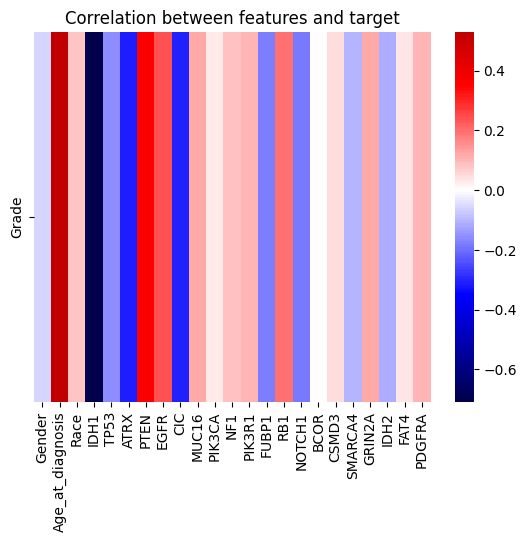

In [69]:
import seaborn as sb

sb.heatmap(data.corr()[['Grade']].drop('Grade').T, annot=False, cmap='seismic', center=0);
plt.title('Correlation between features and target');

We were able to see that mutations of the genes "IDH1", "ATRX" and "CIC" are good indicators of **LGG**, with "IDH1" presenting a particularly higher correlation than the others.

On the other hand, we could notice that the higher the "Age at diagnosis", the higher the probability of the patient's glioma being graded as **GBM**. 

### Checking for outliers

Since the "Age at diagnosis" feature is the only numerical feature in the dataset, we will check for outliers in this feature. The features corresponding to the genetic mutation all have binary values, so there is no need to check for outliers.

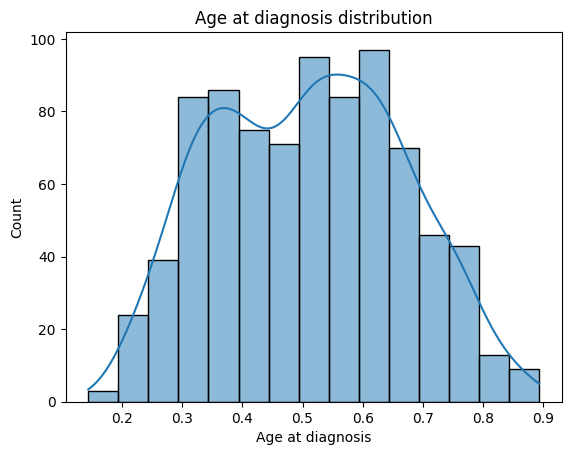

In [70]:
sb.histplot(data['Age_at_diagnosis'], kde=True);
plt.title('Age at diagnosis distribution');
plt.xlabel('Age at diagnosis');

By analysing the histogram of this feature, we can verify that there are no outliers. Considering the normalization of the data performed before-hand, we can see that the values are within a reasonable range (i.e., between close to 10 years old and 90 years old).

### Data visualization

To understand if the data is balanced or not, we will plot the distribution of the classes in the "Grade" column, which represents the glioma grade.

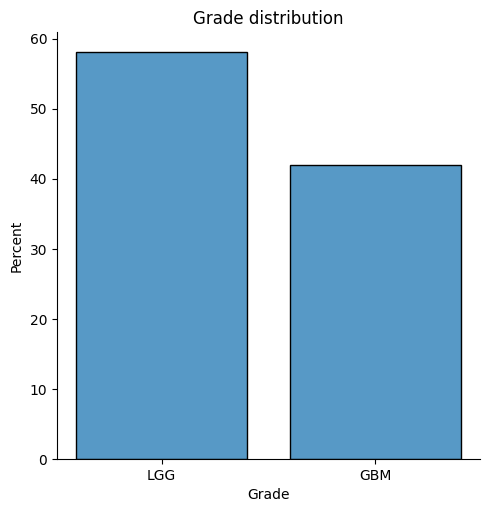

In [71]:
sb.displot(data['Grade'], stat='percent', discrete=True, shrink=0.8);
plt.xticks([0, 1], ['LGG', 'GBM']);
plt.title('Grade distribution');

By the analysis of the plot, we could see that the data was, in fact, balanced, with a similar number of records for each class.

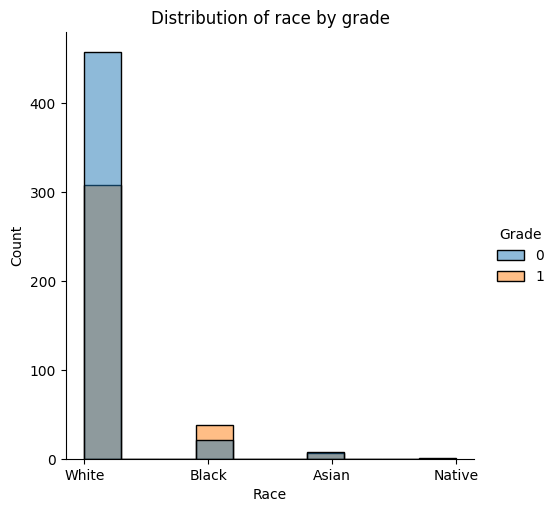

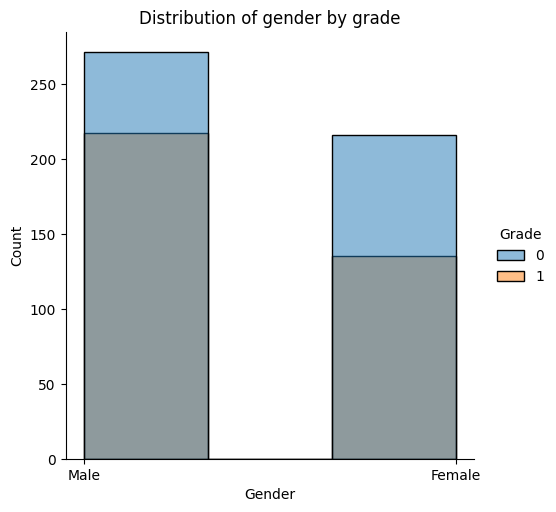

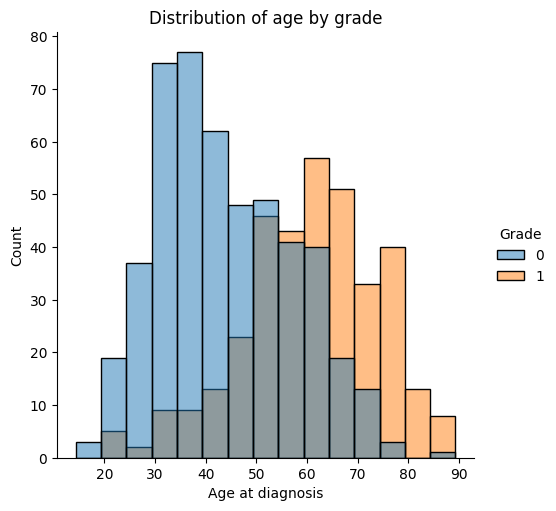

In [72]:
sb.displot(data=data, x="Race", hue="Grade", binwidth=0.3);
plt.xticks(sorted(data["Race"].unique()), ["White", "Black", "Asian", "Native"]);
plt.title('Distribution of race by grade');
sb.displot(data=data, x="Gender", hue="Grade", binwidth=0.3);
plt.xticks(sorted(data["Gender"].unique()), ["Male", "Female"]);
plt.title('Distribution of gender by grade');
data_age_denormalized = data.copy()
data_age_denormalized["Age_at_diagnosis"] *= 100
sb.displot(data=data_age_denormalized, x="Age_at_diagnosis", hue="Grade");
plt.title('Distribution of age by grade');
plt.xlabel('Age at diagnosis');

By analysing the distribution of the Glioma grade across "asian" and "american indian or alaska native" races, we noticed that these were under represented and lacked in the number and variety of data samples. Considering this, we decided to merge both into one single category, "other".

In [73]:
data['Race'] = data['Race'].replace({3: 2});

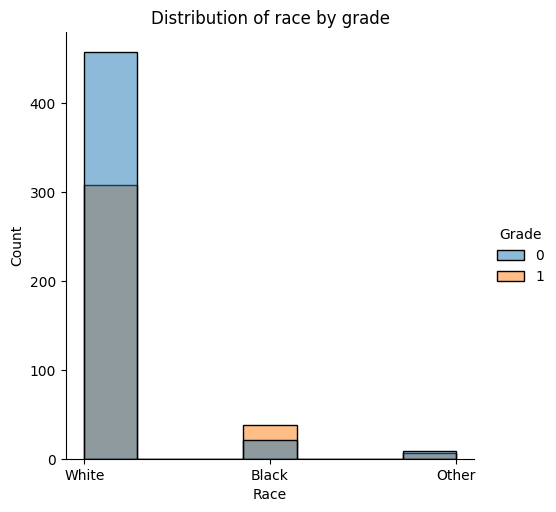

In [74]:
sb.displot(data=data, x="Race", hue="Grade", binwidth=0.3);
plt.xticks(sorted(data["Race"].unique()), ["White", "Black", "Other"]);
plt.title('Distribution of race by grade');

Another viable approach would be to also merge the "black or african american" category with the "other" category, as they are also under represented, performing some operation to try and balance the data (e.g., duplicating the data in these categories). However, in order to maintain the diversity of the data, we decided to keep them separated. Given the nature of the dataset, even though both these categories were under represented, there still can be an interest in the differences between them and the "white" category.

### Exporting clean dataset file

In [75]:
data.to_csv("../data/TCGA_GBM_LGG_Mutations_clean.csv", index=True)

---

## Supervised Learning Algorithms

In this section, we will apply different supervised learning algorithms to the dataset, obtain the best model for each algorithm, and evaluate the performance of each selected model.

For the sake of the reproducibility of the following process, we will use a fixed random state for the algorithms that have a random component.

In [76]:
random_state = 1

### Data Splitting

We will split the dataset into training and test sets, with **80%** of the data being used for training and **20%** for testing.

The training set will be used to train and fine-tune the different models, obtaining the best set of hyperparameters for each one.

The test set will be used to evaluate and compare the different performance metrics across each selected model. 

In [77]:
from sklearn.model_selection import train_test_split

all_labels = data['Grade'].astype(int).values
all_inputs = data.drop(columns=['Grade']).values

X_train, X_test, y_train, y_test = train_test_split(all_inputs, all_labels, test_size=0.2, random_state=random_state)

### Evaluating Classification Models

For this classification task, we will train each model according to the following classification algorithms, as provided by the scikit-learn library:
- Nearest Neighbors
- Decision Tree
- Support Vector Machine
- Neural Network
- Guassian Naive Bayes
- Random Forest
- Gradient Boosting

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import StratifiedKFold

nearest_neighbors_classifier = KNeighborsClassifier()
decision_tree_classifier = DecisionTreeClassifier()
support_vector_classifier = SVC()
neural_network_classifier = MLPClassifier()
naive_bayes_classifier = GaussianNB()
random_forest_classifier = RandomForestClassifier()
gradient_boosting_classifier = GradientBoostingClassifier()

selected_models = {}

cross_validation = StratifiedKFold(n_splits=5)


In order to save the trained models and reuse them later for predictions, we will use the `joblib` library.

As some of the algorithms take a long time to train the models (Gradient Boosting takes up to 1 hour), we will a add a flag `load_models` to enable the loading of the trained models from the disk.

If the flag is set to `False`, the models will be trained and saved to the disk. If the flag is set to `True`, the models will be loaded from the disk and the training process will be skipped.

For the purpose of demonstration, we pre-trained the models using grid search and saved them to the disk. The models are saved in the `models` folder.

In [79]:
import joblib

load_models = True

#### Nearest Neighbors

In [80]:
if not load_models:

    from sklearn.model_selection import GridSearchCV

    parameter_grid = {'n_neighbors': range(1, 10),
                    'weights': ['uniform', 'distance'],
                    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                    'leaf_size': range(10, 50, 10),
                    'p': range(1, 5)}

    nn_grid_search = GridSearchCV(estimator=nearest_neighbors_classifier,
                            param_grid=parameter_grid,
                            cv=cross_validation,
                            n_jobs=-1)

    nn_grid_search.fit(X_train, y_train)

    selected_models['Nearest Neighbors'] = nn_grid_search.best_estimator_

    joblib.dump(nn_grid_search.best_estimator_, '../models/nearest_neighbors.pkl')

    print('Best score: {}'.format(nn_grid_search.best_score_))
    print('Best parameters: {}'.format(nn_grid_search.best_params_))
    print('Training time: {}'.format(nn_grid_search.refit_time_))

In [81]:
if load_models:
    selected_models['Nearest Neighbors'] = joblib.load('../models/nearest_neighbors.pkl')

#### Decision Tree

In [82]:
if not load_models:

    parameter_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
                    'splitter': ['best', 'random'],
                    'max_depth': range(1, 23),
                    'min_samples_split': range(2, 10),
                    'min_samples_leaf': range(1, 5),
                    'ccp_alpha': [0.0, 0.1, 0.2],
                    'random_state': [random_state]}

    dt_grid_search = GridSearchCV(estimator=decision_tree_classifier,
                                param_grid=parameter_grid,
                                cv=cross_validation,
                                n_jobs=-1)

    dt_grid_search.fit(X_train, y_train)

    selected_models['Decision Tree'] = dt_grid_search.best_estimator_

    joblib.dump(dt_grid_search.best_estimator_, '../models/decision_tree.pkl')

    print('Best score: {}'.format(dt_grid_search.best_score_))
    print('Best parameters: {}'.format(dt_grid_search.best_params_))
    print('Training time: {}'.format(dt_grid_search.refit_time_))

In [83]:
if load_models:
    selected_models['Decision Tree'] = joblib.load('../models/decision_tree.pkl')

##### Exporting the decision tree to a file

In [84]:
import sklearn.tree as tree

with open('../out/glioma_decision_tree_classifier.dot', 'w') as out_file:
    out_file = tree.export_graphviz(selected_models['Decision Tree'], out_file=out_file, feature_names=data.columns[1:])

#### Support Vector Machine

In [85]:
if not load_models:

    parameter_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                    'degree': range(2, 5),
                    'gamma': ['scale', 'auto'],
                    'random_state': [random_state]}

    svm_grid_search = GridSearchCV(estimator=support_vector_classifier,
                                param_grid=parameter_grid,
                                cv=cross_validation,
                                n_jobs=-1)

    svm_grid_search.fit(X_train, y_train)

    selected_models['Support Vector'] = svm_grid_search.best_estimator_

    joblib.dump(svm_grid_search.best_estimator_, '../models/support_vector.pkl')

    print('Best score: {}'.format(svm_grid_search.best_score_))
    print('Best parameters: {}'.format(svm_grid_search.best_params_))
    print('Training time: {}'.format(svm_grid_search.refit_time_))

In [86]:
if load_models:
    selected_models['Support Vector'] = joblib.load('../models/support_vector.pkl')

#### Neural Network

In [87]:
def display_mlp_loss_curve(mlp_model):
    plt.figure(figsize=(10, 5))
    plt.title("Convergence of loss function")
    plt.plot(mlp_model.loss_curve_)
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()
    
def display_mlp_weights(mlp):
    fig = plt.figure(figsize=(20, 10))

    for i, coef in enumerate(mlp.coefs_):
        ax = fig.add_subplot(2, mlp.n_layers_  // 2, i + 1)
        fig.tight_layout(w_pad=4.0, h_pad=5.0)
        im = ax.imshow(coef, aspect='auto', cmap='coolwarm')
        ax.set_title(f'Layer {i+1}')
        ax.set_yticks(range(coef.shape[0]))
        if i == 0:
            ax.set_yticklabels(data.columns[1:])
            ax.set_ylabel('Feature')
        else:
            ax.set_ylabel(f'Layer {i} Neuron')
            if coef.shape[0] > 25:
                ax.set_yticklabels([])
                
        ax.set_xticks(range(coef.shape[1]))
        if coef.shape[1] > 25:
            ax.set_xticklabels([])
        else:
            ax.set_xticklabels(range(coef.shape[1]))
        ax.set_xlabel('Neuron')

    fig.colorbar(im, orientation='vertical', fraction=.1)
    plt.show()

In [88]:
if not load_models:

  hidden_layer_sizes = [(50,), (25,), (10,), (50, 25), (25, 10), (50, 25, 10), (25, 10, 5), (50, 25, 10, 5), (25, 10, 5, 2), (50, 25, 10, 5, 2)]

  parameter_grid = {'hidden_layer_sizes': hidden_layer_sizes,
                    'activation': ['identity', 'logistic', 'tanh'],
                    'solver': ['sgd', 'adam'],
                    'alpha': [0.0001, 0.001, 0.01],
                    'batch_size': range(20, 100, 20),
                    'learning_rate': ['constant', 'adaptive'],
                    'early_stopping': [True, False],
                      'max_iter': [1000], 
                    'random_state': [random_state]}
                                                          
  mlp_grid_search = GridSearchCV(estimator=neural_network_classifier,
                              param_grid=parameter_grid,
                              cv=cross_validation,
                              n_jobs=-1)

  mlp_grid_search.fit(X_train, y_train)

  selected_models['Neural Network'] = mlp_grid_search.best_estimator_

  joblib.dump(mlp_grid_search.best_estimator_, '../models/neural_network.pkl')

  print('Best score: {}'.format(mlp_grid_search.best_score_))
  print('Best parameters: {}'.format(mlp_grid_search.best_params_))
  print('Training time: {}'.format(mlp_grid_search.refit_time_))
  display_mlp_loss_curve(selected_models['Neural Network'])
  display_mlp_weights(selected_models['Neural Network'])

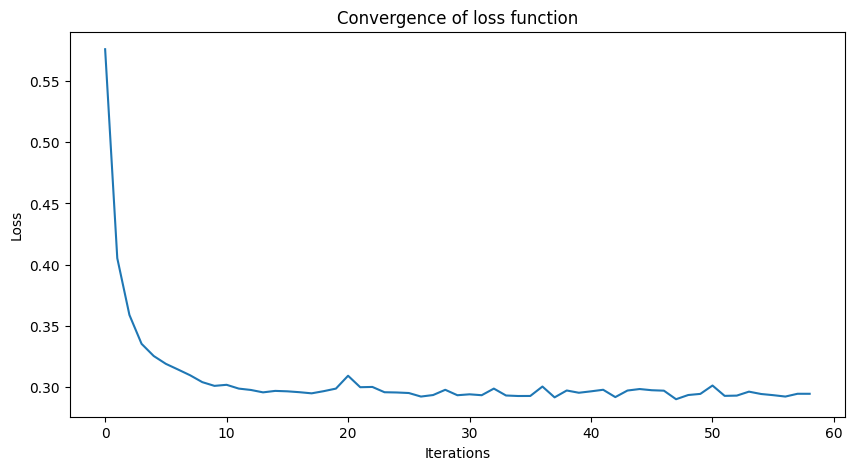

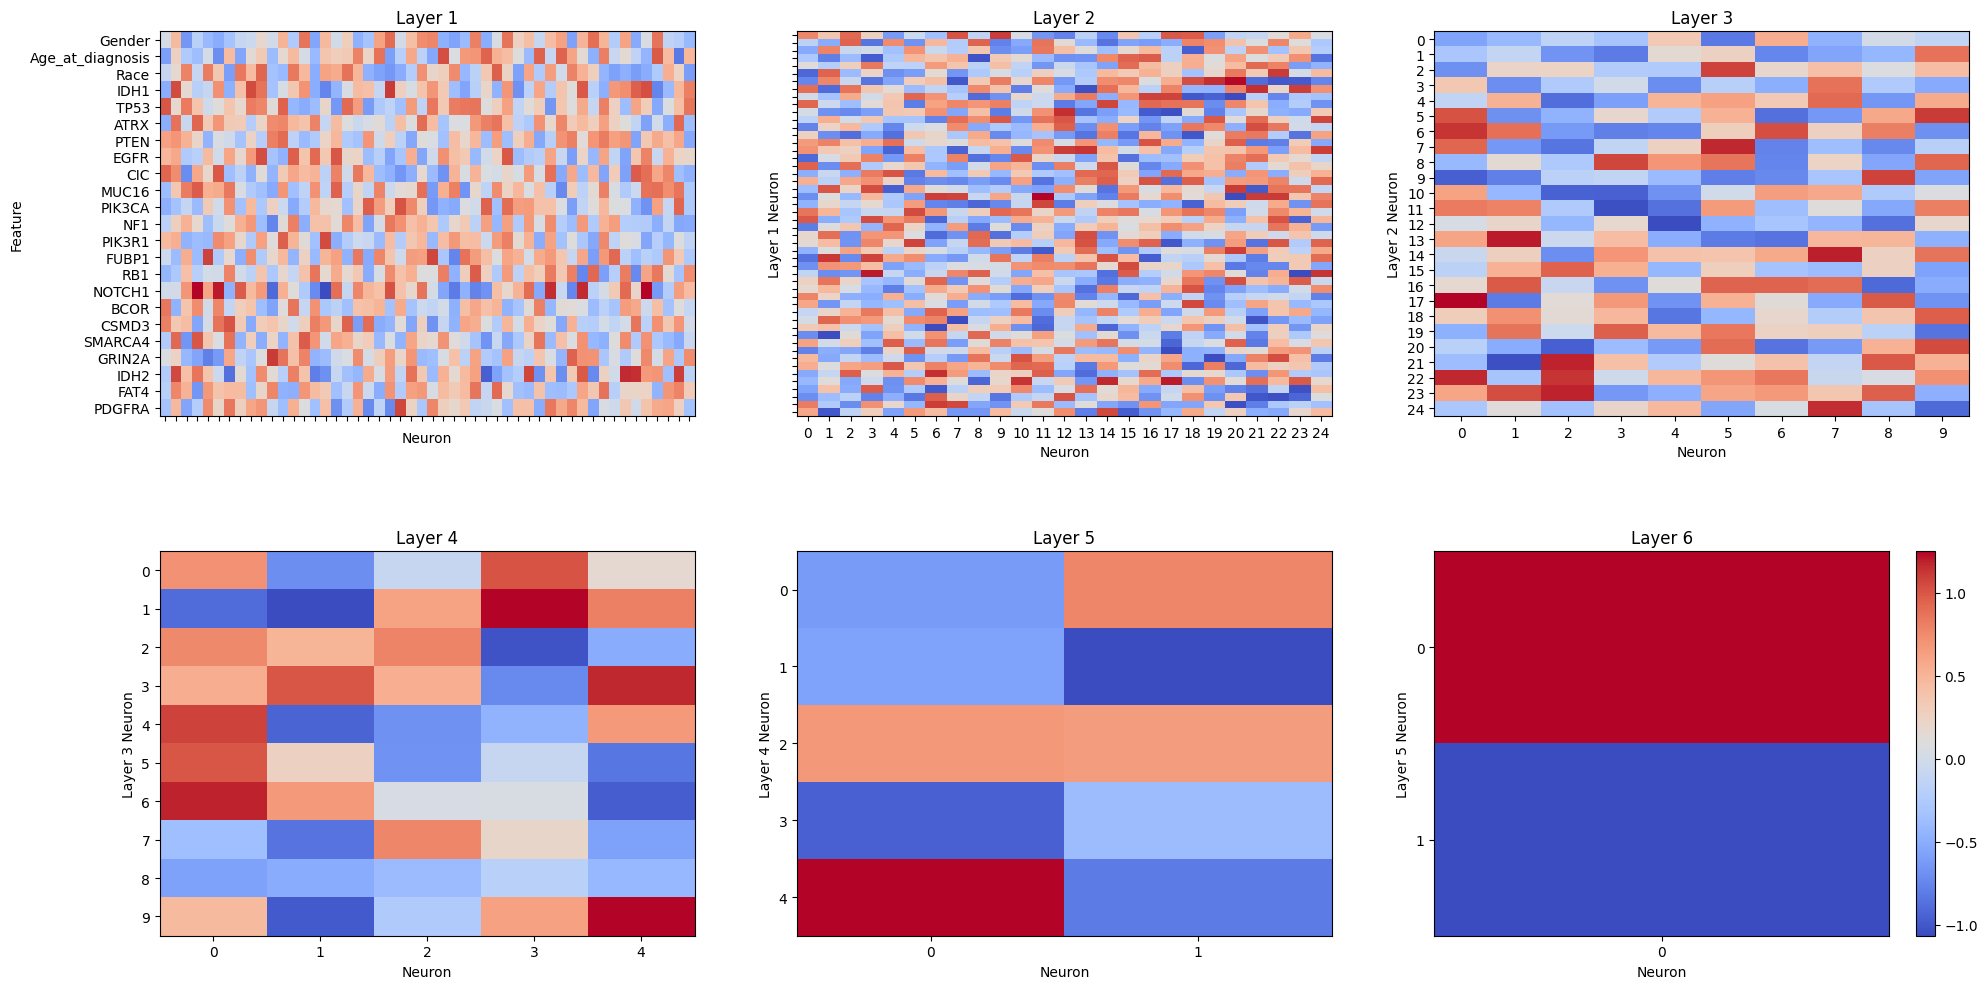

In [89]:
if load_models:
    selected_models['Neural Network'] = joblib.load('../models/neural_network.pkl')
    display_mlp_loss_curve(selected_models['Neural Network'])
    display_mlp_weights(selected_models['Neural Network'])

#### Gaussian Naive Bayes

In [90]:
if not load_models:

    parameter_grid = {'var_smoothing': [1e-9, 1e-10, 1e-11, 1e-12, 1e-13]}


    gnb_grid_search = GridSearchCV(estimator=naive_bayes_classifier,
                                param_grid=parameter_grid,
                                cv=cross_validation,
                                n_jobs=-1)

    gnb_grid_search.fit(X_train, y_train)

    selected_models['Naive Bayes'] = gnb_grid_search.best_estimator_

    joblib.dump(gnb_grid_search.best_estimator_, '../models/naive_bayes.pkl')

    print('Best score: {}'.format(gnb_grid_search.best_score_))
    print('Best parameters: {}'.format(gnb_grid_search.best_params_))
    print('Training time: {}'.format(gnb_grid_search.refit_time_))

In [91]:
if load_models:
    selected_models['Naive Bayes'] = joblib.load('../models/naive_bayes.pkl')

#### Random Forest

In [92]:
if not load_models:

    parameter_grid = {'n_estimators': range(10, 20),
                    'criterion': ['gini', 'entropy', 'log_loss'],
                    'max_depth': range(1, 23),
                    'min_samples_split': range(2, 10),
                    'min_samples_leaf': range(1, 5),
                    'ccp_alpha': [0.0, 0.1, 0.2],
                    'random_state': [random_state]}
                    
    rf_grid_search = GridSearchCV(estimator=random_forest_classifier,
                                param_grid=parameter_grid,
                                cv=cross_validation,
                                n_jobs=-1)

    rf_grid_search.fit(X_train, y_train)

    selected_models['Random Forest'] = rf_grid_search.best_estimator_

    joblib.dump(rf_grid_search.best_estimator_, '../models/random_forest.pkl')

    print('Best score: {}'.format(rf_grid_search.best_score_))
    print('Best parameters: {}'.format(rf_grid_search.best_params_))
    print('Training time: {}'.format(rf_grid_search.refit_time_))
                    

In [93]:
if load_models:
    selected_models['Random Forest'] = joblib.load('../models/random_forest.pkl')

#### Gradient Boosting

In [94]:
if not load_models:

  parameter_grid = {'loss': ['log_loss', 'exponential'],
                    'learning_rate': [0.01, 0.1, 1.0],
                      'n_estimators': range(10, 20),
                      'criterion' : ['friedman_mse', 'squared_error'],
                      'max_depth': range(1, 23),
                      'min_samples_split': range(2, 10),
                      'min_samples_leaf': range(1, 5),
                      'ccp_alpha': [0.0, 0.1, 0.2],
                      'random_state': [random_state]
  }

  gb_grid_search = GridSearchCV(estimator=gradient_boosting_classifier,
                              param_grid=parameter_grid,
                              cv=cross_validation,
                              n_jobs=-1)

  gb_grid_search.fit(X_train, y_train)

  selected_models['Gradient Boosting'] = gb_grid_search.best_estimator_

  joblib.dump(gb_grid_search.best_estimator_, '../models/gradient_boosting.pkl')

  print('Best score: {}'.format(gb_grid_search.best_score_))
  print('Best parameters: {}'.format(gb_grid_search.best_params_))
  print('Training time: {}'.format(gb_grid_search.refit_time_))

In [95]:
if load_models:
    selected_models['Gradient Boosting'] = joblib.load('../models/gradient_boosting.pkl')

### Learning Curves

Here, we will plot the learning curves for the best model of each algorithm.

Each learning curve depicts the average evolution of both the training and validation scores throughout the training process of each cross-validation fold.

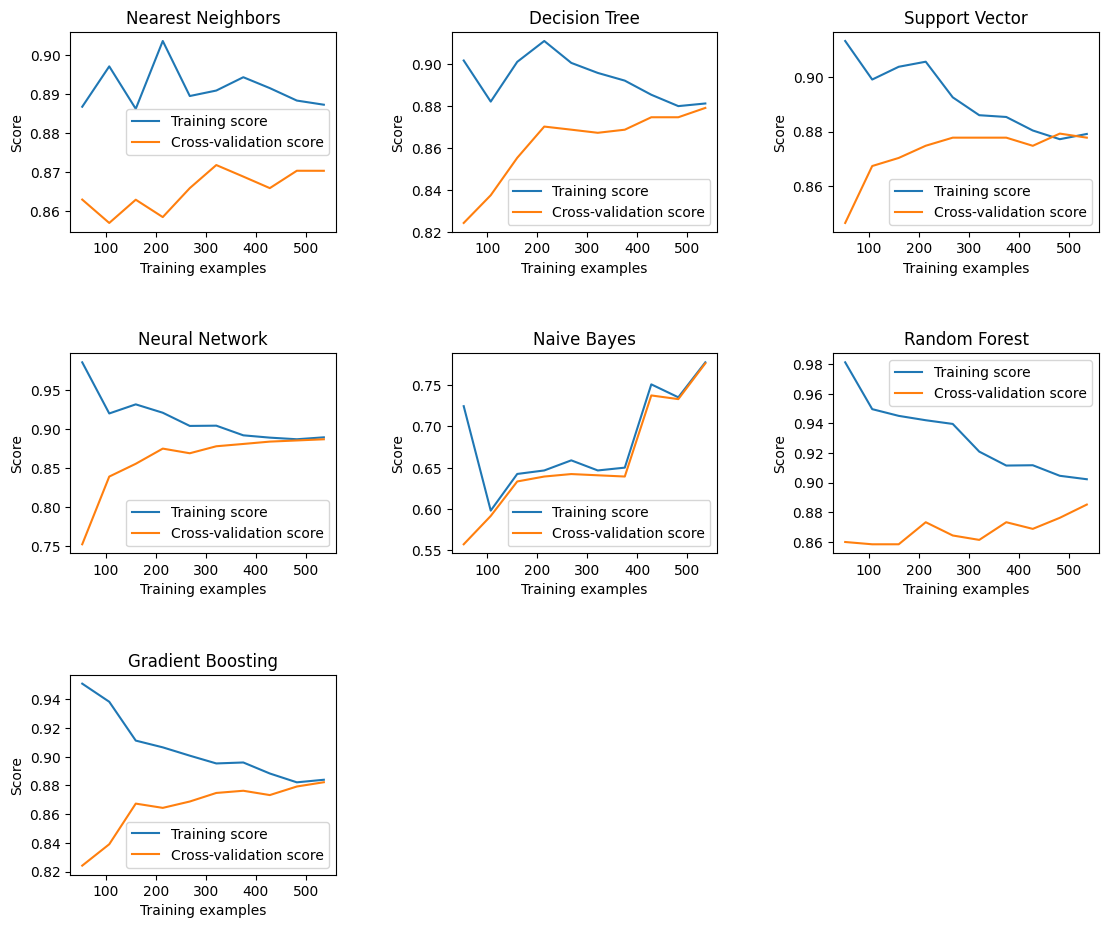

In [96]:
from sklearn.model_selection import learning_curve

fig = plt.figure(figsize=(12, 10))

for model_name, model in selected_models.items():
    train_sizes, train_scores, validation_scores = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=cross_validation, n_jobs=-1, random_state=random_state)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    
    ax = fig.add_subplot(3, 3, list(selected_models.keys()).index(model_name) + 1)
    fig.tight_layout(pad=4) 
    ax.plot(train_sizes, train_scores_mean, label='Training score')
    ax.plot(train_sizes, validation_scores_mean, label='Cross-validation score')
    ax.set_title(model_name)
    ax.set_xlabel('Training examples')
    ax.set_ylabel('Score')
    ax.legend()

plt.show()

Most learning curves depict a decreasing trend in the training score. This is likely due to two main factors:
- As the model incorporates more training examples, the overall complexity and diversity of training data increases, which makes it harder for the model to fit the training data perfectly.
- In cross-validation, the models are selected based on the validation score, which means that the models are selected based on their ability to generalize to unseen data. This can lead to a decrease in the training score, as the models avoid overfitting to the training data.

All learning curves depict an increasing trend in the validation score. This is a good indicator that the models are learning the underlying patterns in the dataset and generalizing well.

However, the Naive Bayes model exhibits a concurrent increase in both the training and validation scores. This is likely due to the independence assumption of the Naive Bayes model, which simplifies the model and reduces the risk of overfitting, and its probabilistic nature, which leads to an increase in both the training and validation scores, as the model trains on more data and the probability estimates become more accurate.

### Model Comparison

We wanted to compare the performance of the best model for each algorithm, based on the following metrics:
- Accuracy
- Precision
- Recall
- F1-Score
- Prediction Time

This analysis would allow us to determine which model is the most suitable for the classification task at hand.

The chosen metrics will give us a good understanding of the model's performance, as they provide a comprehensive view of the model's ability to correctly classify the data, as well as the time it takes to make predictions, which is also an important factor to consider, specially in real-time applications (such as medical diagnosis).

In [97]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import timeit

evaluation_parameters = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score', "True Positive", "False Positive", "True Negative", "False Negative", "Test Size", "Total Prediction Time (ms)", "Average Prediction Time (ms)"]
model_evaluation = pd.DataFrame(columns=evaluation_parameters)
positive_value = 1
positive_label = 'GBM'

In [98]:
test_size = len(y_test)

for model_name, model in selected_models.items():
    start_time = timeit.default_timer()
    y_predicted = model.predict(X_test)
    end_time = timeit.default_timer()
    prediction_time = (end_time - start_time) * 1000
    model_classification_report = classification_report(y_test, y_predicted, labels=[positive_value], target_names=[positive_label], digits=3, output_dict=True)
    model_confusion_matrix = confusion_matrix(y_test, y_predicted)
    model_evaluation = pd.concat(
        [model_evaluation,
            pd.DataFrame([[model_name,
                            accuracy_score(y_test, model.predict(X_test)),
                            model_classification_report[positive_label]['precision'],
                            model_classification_report[positive_label]['recall'],
                            model_classification_report[positive_label]['f1-score'],
                            model_confusion_matrix[1][1],
                            model_confusion_matrix[0][1],
                            model_confusion_matrix[0][0],
                            model_confusion_matrix[1][0],
                            len(y_test),
                            prediction_time,
                            prediction_time/test_size,
                        ]], columns=evaluation_parameters)],
        ignore_index=True)

C:\Users\joaof\AppData\Local\Temp\ipykernel_12988\1973506610.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_evaluation = pd.concat(


In [99]:
model_evaluation.head(len(selected_models))

,Model,Accuracy,Precision,Recall,F1-score,True Positive,False Positive,True Negative,False Negative,Test Size,Total Prediction Time (ms),Average Prediction Time (ms)
0,Nearest Neighbors,0.827381,0.804598,0.853659,0.828402,70,17,69,12,168,10.4466,0.062182
1,Decision Tree,0.833333,0.806818,0.865854,0.835294,71,17,69,11,168,0.3893,0.002317
2,Support Vector,0.845238,0.811111,0.890244,0.848837,73,17,69,9,168,1.2405,0.007384
3,Neural Network,0.839286,0.823529,0.853659,0.838323,70,15,71,12,168,0.3515,0.002092
4,Naive Bayes,0.797619,0.726415,0.939024,0.819149,77,29,57,5,168,0.2963,0.001764
5,Random Forest,0.815476,0.800000,0.829268,0.814371,68,17,69,14,168,0.7226,0.004301
6,Gradient Boosting,0.839286,0.816092,0.865854,0.840237,71,16,70,11,168,0.3372,0.002007


### Confusion Matrix

Plotting the confusion matrix for each model will provide us a more detailed insight over the model's performance, as it will allow us to see the number of true positives, true negatives, false positives, and false negatives.

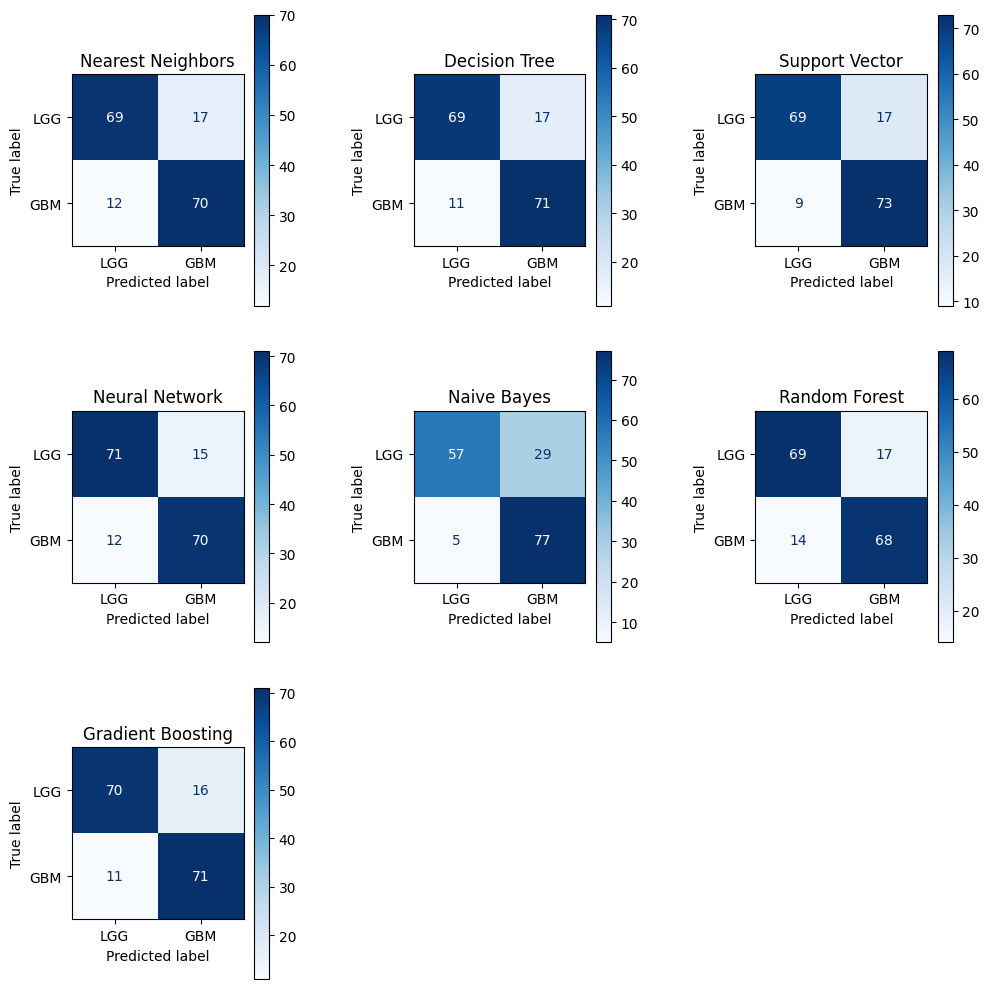

In [100]:
from sklearn.metrics import ConfusionMatrixDisplay

fig = plt.figure(figsize=(10, 10))

for model_name, model in selected_models.items():
    confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, model.predict(X_test)), display_labels=['LGG', 'GBM'])
    confusion_matrix_display.plot(cmap='Blues', ax=fig.add_subplot(3, 3, list(selected_models.keys()).index(model_name) + 1), xticks_rotation='horizontal')
    fig.tight_layout(w_pad=4.0, h_pad=3.0)
    plt.title(model_name)
    
plt.show()

These confusion matrices will be used to further evaluate the performance of the models, along with the information provided by the classification reports.

### Classification Report

Visualizing the classification report for each model in bar plot form will facilitate the comparison of the performance of each model across the different metrics.

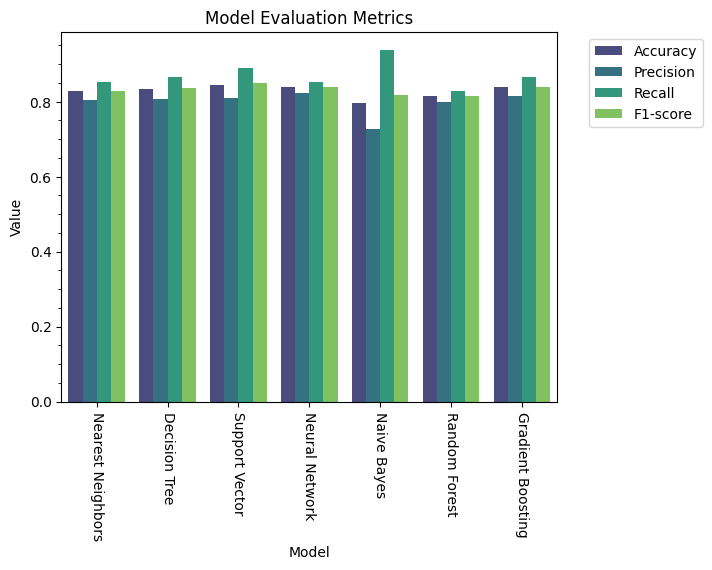

In [101]:
import seaborn as sb
import matplotlib.pyplot as plt

model_evaluation_melted = model_evaluation[["Model", "Accuracy", "Precision", "Recall", "F1-score"]].melt(id_vars=["Model"], var_name="Measure", value_name="Value")

sb.barplot(data=model_evaluation_melted, x='Model', y='Value', hue='Measure', palette='viridis')
plt.title('Model Evaluation Metrics')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tick_params(axis='x', labelrotation=270)
plt.yticks(np.arange(0, 1.0, 0.05), minor=True)
plt.show()

By looking at the classification report for each model, we can see that the **Support Vector Machine** and **Neural Network** models have the **highest accuracy**. The **Support Vector Machine** model also has the **highest F1-score**, close to the **Gradient Boosting** model, while the **Neural Network** model has the **highest precision**. As for the **recall**, the **Naive Bayes** model is, by far, the best.

Stating that the **Neural Network** model is the more precise means that it has the lowest number of **false positives**. On the other hand, the **Naive Bayes** model has the highest recall, which means that it has the lowest number of **false negatives**. Since this is a medical diagnosis task, it is specially important to minimize the number of false negatives, as it is crucial to correctly identify the patients with the most severe condition.

The **Support Vector Machine** and **Gradient Boosting** models seem to have the best balance between precision and recall, as they have the highest **F1-score**.

As they have the highest accuracy, which is the most general and widely-used measure of performance, the **Support Vector Machine** and **Neural Network** models could be regarded as the best models for this classification task. Since this metric can be misleading, we will also consider other metrics to accurately evaluate the models.

### Prediction Time

As this is a crucial metric for real-time applications, we will plot the prediction time for each model. Following the context of medical diagnosis, it is important to have a model that can make predictions in a reasonable amount of time.

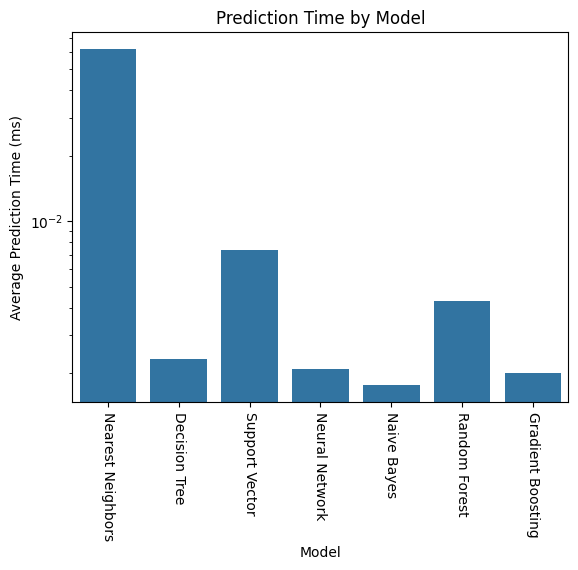

In [102]:
sb.barplot(data=model_evaluation, x='Model', y='Average Prediction Time (ms)')
plt.title('Prediction Time by Model')
plt.tick_params(axis='x', labelrotation=270)
plt.yscale('log')
plt.show();

The **Nearest Neighbors** model takes two orders of magnitude more time to make predictions than most of the other models, while the **Naive Bayes** and **Decision Tree** models are the fastest. Since none of the models takes more than a tenth of a millisecond to make predictions, the prediction time is not a critical factor for a dataset with similar volume. However, considering this task could be scaled to a (much) larger dataset, the prediction time for the **Nearest Neighbors** model could become an issue, as it is significantly higher than the other models. 

### ROC Curve

Illustrating the ROC curve (receiver operating characteristic curve) for each model will allow us to understand the trade-off between the true positive rate and the false positive rate, as well as the area under the curve (AUC), which is a good indicator of the model's performance.

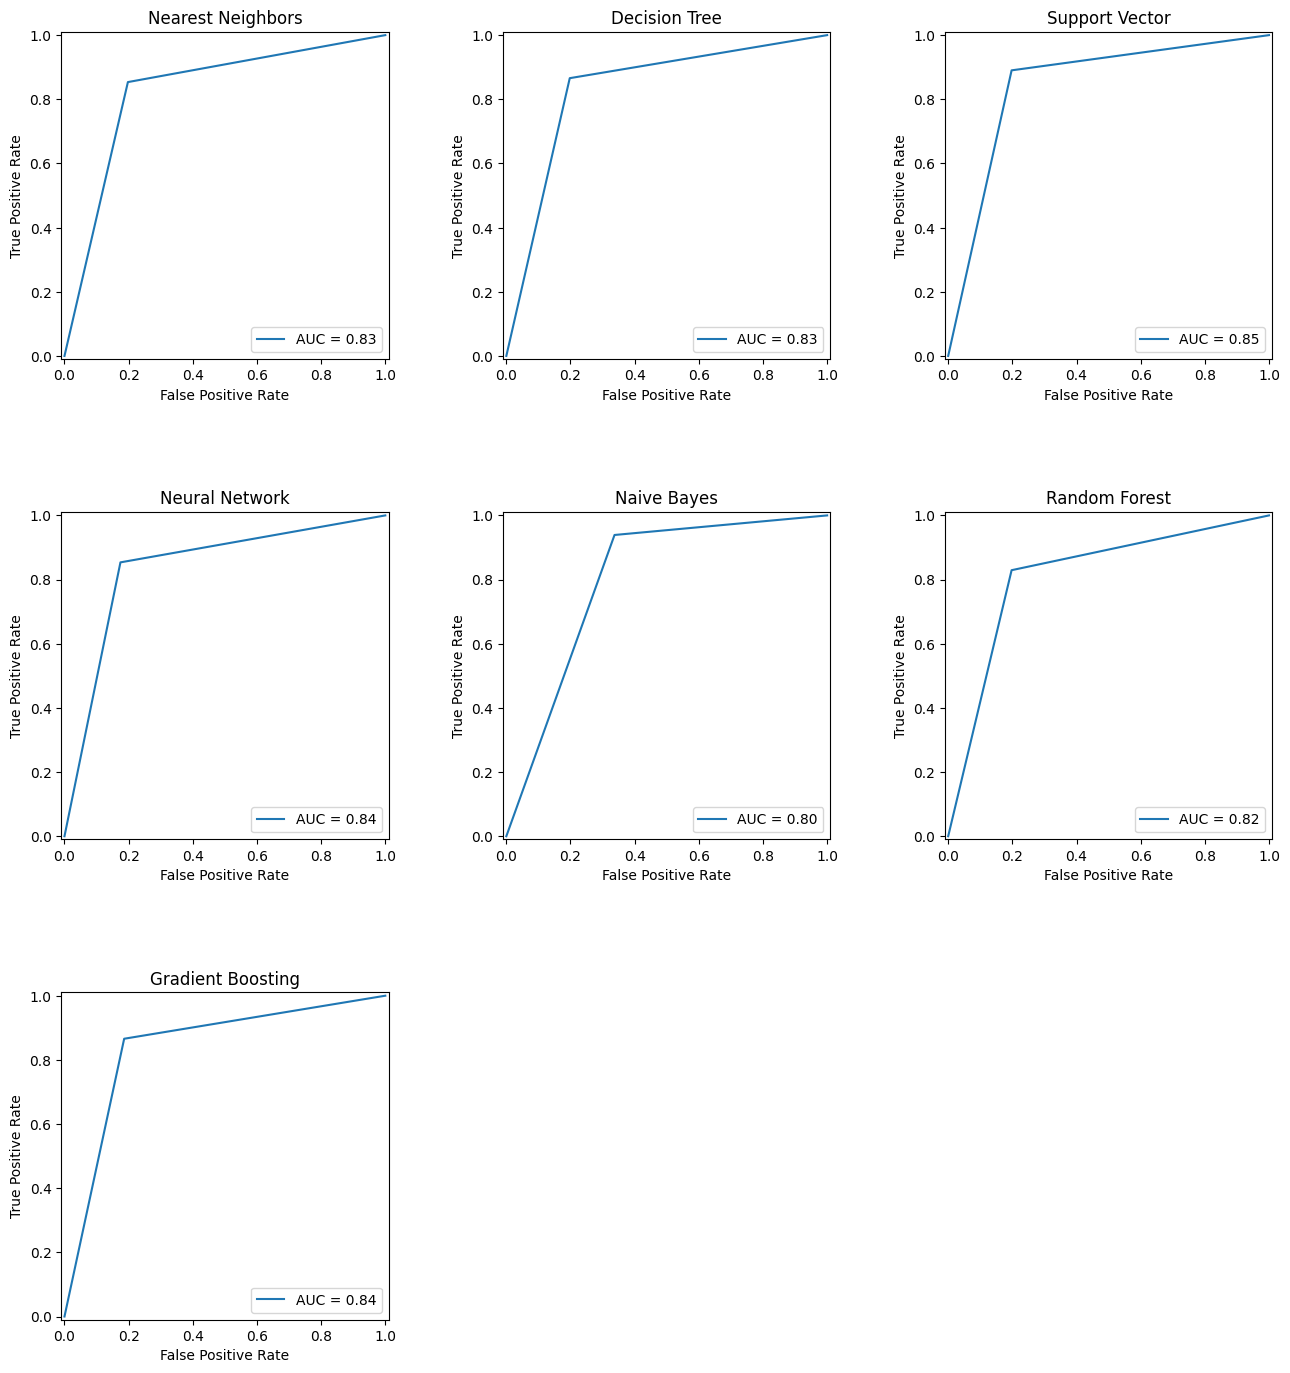

In [103]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc

fig = plt.figure(figsize=(13, 15))

for model_name, model in selected_models.items():
    y_predicted = model.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_predicted)
    roc_auc = auc(fpr, tpr)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    roc_display.plot(ax=fig.add_subplot(3, 3, list(selected_models.keys()).index(model_name) + 1))
    fig.tight_layout(w_pad=4.0)
    plt.title(model_name)

plt.show()

Since the ROC curve measures the trade-off between the true positive rate and the false positive rate, it provides a comprehensive view of the model's ability to correctly classify the data. Therefore, a higher AUC indicates better performance (i.e., if the AUC was **1**, the model's predictions would be **100%** correct).

For this task, the model with the highest AUC is the **Support Vector Machine** model, followed by the **Neural Network** and the **Gradient Boosting** models. On the other hand, the two models that stand out as the worst are the **Naive Bayes** and the **Random Forest** models. This information is a valuable indicator of which model is the most suitable for the classification task at hand, as we should consider to prioritize the models with the highest AUC.

### Cost Analysis

To properly evaluate and compare the different models, we will calculate the cost for each one. This metric will allow us to penalize the models that have a higher number of false negatives, which is crucial for this medical diagnosis task. For the specific context of brain glioma grading, it is also important to minimize the number of false positives. A patient diagnosed with a false positive could be subjected to unnecessary treatments, which could have a negative impact on their health.

In [104]:
true_positive_cost = -1
false_positive_cost = 19
true_negative_cost = 0
false_negative_cost = 80

model_evaluation['Total Cost'] = (model_evaluation['True Positive'] * true_positive_cost) + (model_evaluation['False Positive'] * false_positive_cost) + (model_evaluation['True Negative'] * true_negative_cost) + (model_evaluation['False Negative'] * false_negative_cost)

model_evaluation.head(len(selected_models))

,Model,Accuracy,Precision,Recall,F1-score,True Positive,False Positive,True Negative,False Negative,Test Size,Total Prediction Time (ms),Average Prediction Time (ms),Total Cost
0,Nearest Neighbors,0.827381,0.804598,0.853659,0.828402,70,17,69,12,168,10.4466,0.062182,1213
1,Decision Tree,0.833333,0.806818,0.865854,0.835294,71,17,69,11,168,0.3893,0.002317,1132
2,Support Vector,0.845238,0.811111,0.890244,0.848837,73,17,69,9,168,1.2405,0.007384,970
3,Neural Network,0.839286,0.823529,0.853659,0.838323,70,15,71,12,168,0.3515,0.002092,1175
4,Naive Bayes,0.797619,0.726415,0.939024,0.819149,77,29,57,5,168,0.2963,0.001764,874
5,Random Forest,0.815476,0.800000,0.829268,0.814371,68,17,69,14,168,0.7226,0.004301,1375
6,Gradient Boosting,0.839286,0.816092,0.865854,0.840237,71,16,70,11,168,0.3372,0.002007,1113


We could see that the **Naive Bayes** model has the lowest cost, as it has the lowest number of false negatives. On the other hand, the **Random Forest** model has the highest cost, as it has the highest number of false negatives.

In [105]:
model_evaluation['Accuracy/Cost Ratio'] = model_evaluation['Accuracy'] / model_evaluation['Total Cost']

model_evaluation.head(len(selected_models))

,Model,Accuracy,Precision,Recall,F1-score,True Positive,False Positive,True Negative,False Negative,Test Size,Total Prediction Time (ms),Average Prediction Time (ms),Total Cost,Accuracy/Cost Ratio
0,Nearest Neighbors,0.827381,0.804598,0.853659,0.828402,70,17,69,12,168,10.4466,0.062182,1213,0.000682
1,Decision Tree,0.833333,0.806818,0.865854,0.835294,71,17,69,11,168,0.3893,0.002317,1132,0.000736
2,Support Vector,0.845238,0.811111,0.890244,0.848837,73,17,69,9,168,1.2405,0.007384,970,0.000871
3,Neural Network,0.839286,0.823529,0.853659,0.838323,70,15,71,12,168,0.3515,0.002092,1175,0.000714
4,Naive Bayes,0.797619,0.726415,0.939024,0.819149,77,29,57,5,168,0.2963,0.001764,874,0.000913
5,Random Forest,0.815476,0.800000,0.829268,0.814371,68,17,69,14,168,0.7226,0.004301,1375,0.000593
6,Gradient Boosting,0.839286,0.816092,0.865854,0.840237,71,16,70,11,168,0.3372,0.002007,1113,0.000754


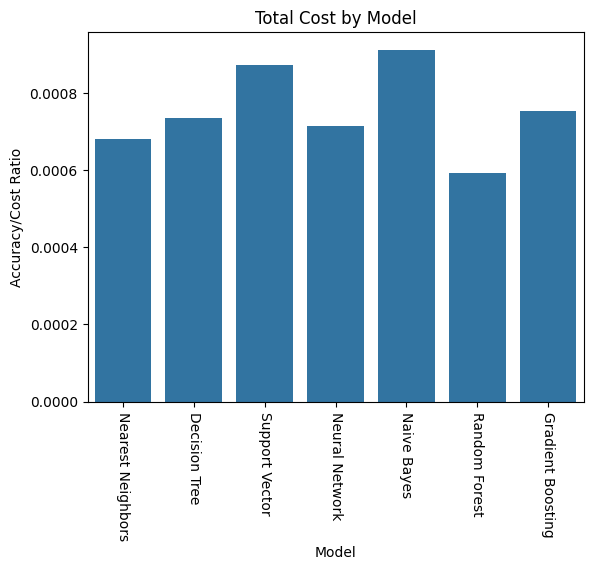

In [114]:
sb.barplot(data=model_evaluation, x='Model', y='Accuracy/Cost Ratio')
plt.title('Total Cost by Model')
plt.tick_params(axis='x', labelrotation=270)
plt.show();

By analysing the accuracy/cost ratio for each model, we could see that the **Naive Bayes** model stood out as the best, as it has the highest ratio. If the goal of the classification task is to really enphasize the importance of minimizing the number of false negatives, this model would probably be the best choice. It also has the advantage of being the fastest model to make predictions. 

### Exporting the models results to a file

In [106]:
model_evaluation.to_csv('../out/glioma_model_evaluation.csv', index=False)

## Conclusion

Regarding the data pre-processing phase of the project, we concluded that it allowed us to simplify the original dataset and merely keep relevant data. 
Furthermore, we were able to treat and convert the data to a more suitable format, which proved to be an essential step in the supervised learning process.
Additionally, the pre-analysis of the dataset gave us some valuable insights that denoted parallels with the conclusions drawn later from the results obtained after the application of the supervised learning techniques.

The grid search approach, with stratified k-fold cross-validation, proved to be a valuable tool in the hyperparameter tuning process. 
This technique allowed us to find the optimal hyperparameters for the selected models, which resulted in the best possible performance for each of them. 
The stratified k-fold cross-validation also ensured that the models were trained and tested on balanced data, which is fundamental to guarantee the models' generalization to unseen data.

With respect to the evaluation of the different supervised learning models, we concluded that among the obtained models, the Support Vector Machine, Neural Network and Gradient Boosting models had the overall best performance.
The grid-search process and finetuning for the Support Vector Machine model was, undeniably, the most time and resource efficient, and this model also presented the best trade off between performance and computational cost.
On the other hand, the Nearest Neighbor model performed the worst, with the lowest accuracy and, by far, the highest prediction time.

The Decision Tree model performed well too, and showed interesting results regarding each feature's impact on the classification task. 
This was the only model that could provide a clear insight into the importance of the attributes, facilitating its interpretation and understanding.
Furthermore, the features chosen by this model aligned with the pre-analysis of the dataset, since they were congruent with the features that showed the highest correlation to the target variable.

Considering an analysis of the selected models that is more sensitive to the context of the classification task at hand, we also computed a weighted cost of the entries of the confusion matrices for each model. In this analysis, the Gaussian Naive Bayes model performed the best, with the lowest weighted cost, due to its lower false negative rate.
On the contrary, the Random Forest model performed the worst, making it the least suitable model for the chosen cost evaluation criteria.

In conclusion, stating that a model is the best suited for a given classification task is a complex and multifaceted statement. This statement really depends on the criteria that are most important for the problem at hand. Since the Glioma grading task corresponds to a medical diagnosis, we determined that the F1-score measure was the best indicator of the models performance. This metric is a good balance between precision and recall, which are both crucial for this task.

## Extra Section

### Dimensionality Reduction

In this section, we will try to find the optimal subset of mutation genes and clinical features for the glioma grading process to improve/maintain performance and reduce costs. The goal is to reduce the dimensionality of the dataset, allowing for faster training and prediction times, while still maintaining a good level of classification performance.

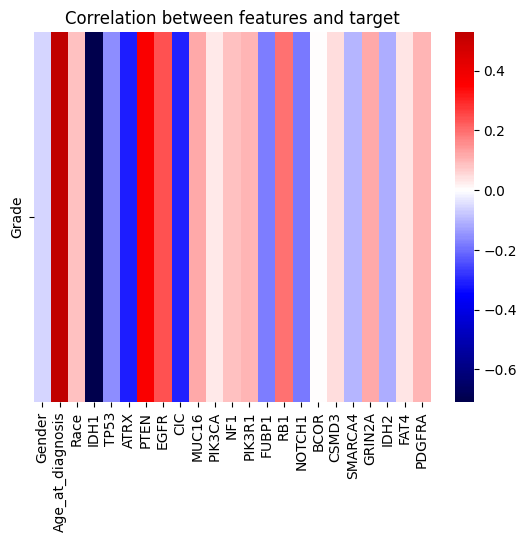

In [107]:
sb.heatmap(data.corr()[['Grade']].drop('Grade').T, annot=False, cmap='seismic', center=0);
plt.title('Correlation between features and target');

By the analysis of the correlation between the features in the dataset and the target variable, we could see that probably not all the features are equally relevant for the classification task. In order to reduce the dimensionality of the dataset, we will try to remove some of the features that are less relevant.

Even though some features have a low correlation with a target variable, they still can play a role in the classification task, as they can be relevant when combined with other features. As we already removed the redundant columns in the data pre-processing phase, we will use the **Recursive Feature Elimination** (RFE) method to rank the features according to their importance and select the best subset of features for the classification task.

As the **Support Vector Machine** model proved to have the best performance, we will use it has the estimator for the RFE method.

Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.

- Optimal number of features: 9
- Score: 84.524%
- Average prediction time: 0.004 ms

Comparing the model with the selected features:

- Accuracy: 0.0% worse

- Prediction time: 59.637% faster


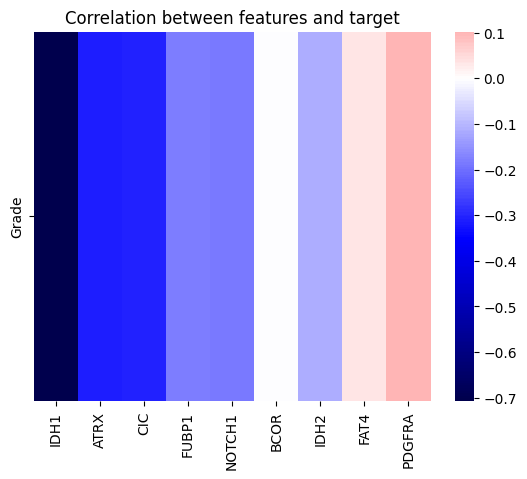

In [108]:
from sklearn.feature_selection import RFECV

data_simplified = data.copy()

rfecv = RFECV(estimator=selected_models["Support Vector"], cv=cross_validation, scoring='accuracy', n_jobs=-1, verbose=1)

rfecv.fit(X_train, y_train)
rfecv_score = rfecv.score(X_test, y_test)

start_time = timeit.default_timer()
rfecv.predict(X_test)
end_time = timeit.default_timer()

avg_prediction_time = (end_time - start_time) * 1000 / len(X_test)

print(f"\n- Optimal number of features: {rfecv.n_features_}")
print(f"- Score: {round(rfecv_score * 100, 3)}%")
print(f"- Average prediction time: {round(avg_prediction_time, 3)} ms")

print("\nComparing the model with the selected features:")

accuracy_diff = rfecv_score - model_evaluation[model_evaluation['Model'] == 'Support Vector']['Accuracy'].values[0]
accuracy_ratio = accuracy_diff / model_evaluation[model_evaluation['Model'] == 'Support Vector']['Accuracy'].values[0]
prediction_time_ratio = avg_prediction_time / model_evaluation[model_evaluation['Model'] == 'Support Vector']['Average Prediction Time (ms)'].values[0] 

print(f"\n- Accuracy: {round(accuracy_ratio, 3)}% worse")
print(f"\n- Prediction time: {round(prediction_time_ratio * 100, 3)}% faster")

data_simplified = data_simplified.drop(columns=data.columns[1:][~rfecv.support_])

sb.heatmap(data_simplified.corr()[['Grade']].drop('Grade').T, annot=False, cmap='seismic', center=0);
plt.title('Correlation between features and target');

By comparing the performance of the model with all the features and the model with the selected subset of features, we determined that the dimensionality reduction was beneficial, as the model with the selected subset of features had a similar performance to the model with all the features, while taking less time to make predictions.

On an additional note, it is important to mention that the optimal number of features and the subset of selected features would be different for each model, so this subset can only be considered optimal for the **Support Vector Machine** model.

### Exporting the simplified dataset file

In [109]:
data_simplified.to_csv("../data/TCGA_GBM_LGG_Mutations_simplified.csv", index=True)